In [22]:
import pandas as pd

nabar_data = pd.read_csv('./NABR_ClimExposure', sep=' ', header=0)
nabar_data.head()

C:\Users\nakulpadalkar\AppData\Local\Temp\ipykernel_62528\3857964118.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  nabar_data = pd.read_csv('./NABR_ClimExposure', sep=' ', header=0)


,Park,long,lat,veg,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,Litter,Shrub,El,Sa,Cl,RF,RL,Slope,E,S,T_P_Corr,DrySoilDays_Winter_top50,DrySoilDays_Spring_top50,DrySoilDays_Summer_top50,DrySoilDays_Fall_top50,DrySoilDays_Winter_whole,DrySoilDays_Spring_whole,DrySoilDays_Summer_whole,DrySoilDays_Fall_whole,Evap_Winter,Evap_Spring,Evap_Summer,Evap_Fall,ExtremeShortTermDryStress_Winter_top50,ExtremeShortTermDryStress_Spring_top50,ExtremeShortTermDryStress_Summer_top50,ExtremeShortTermDryStress_Fall_top50,ExtremeShortTermDryStress_Winter_whole,...,SWA_Spring_top50,SWA_Summer_top50,SWA_Fall_top50,SWA_Winter_whole,SWA_Spring_whole,SWA_Summer_whole,SWA_Fall_whole,T_Winter,T_Spring,T_Summer,T_Fall,T_Annual,Tmax_Winter,Tmax_Spring,Tmax_Summer,Tmax_Fall,Tmin_Winter,Tmin_Spring,Tmin_Summer,Tmin_Fall,Transp_Winter,Transp_Spring,Transp_Summer,Transp_Fall,VWC_Winter_top50,VWC_Spring_top50,VWC_Summer_top50,VWC_Fall_top50,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole,WetSoilDays_Winter_top50,WetSoilDays_Spring_top50,WetSoilDays_Summer_top50,WetSoilDays_Fall_top50,WetSoilDays_Winter_whole,WetSoilDays_Spring_whole,WetSoilDays_Summer_whole,WetSoilDays_Fall_whole
0,NABR,-110.0472,37.60413,Shrubland,1980,Hist,historical,sc1,0,0,84,5,11,7,1764.955,77.03307,6.082058,2.285707,54.572020,1949.283,-8753.784,4834.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.964835,8.767935,23.15924,11.96209,23.159240,14.15,28.75,37.05,31.15,NaN,NaN,NaN,NaN,0.237081,5.296833,1.067496,1.966786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NABR,-110.0472,37.60413,Shrubland,1980,Hist,historical,sc1,0,0,84,5,11,7,1764.955,77.03307,6.082058,2.285707,54.572020,1949.283,-8753.784,4834.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.964835,8.767935,23.15924,11.96209,0.964835,14.15,28.75,37.05,31.15,NaN,NaN,NaN,NaN,0.237081,5.296833,1.067496,1.966786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NABR,-110.0472,37.60413,Shrubland,1980,Hist,historical,sc1,0,0,84,5,11,7,1764.955,77.03307,6.082058,2.285707,54.572020,1949.283,-8753.784,4834.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.964835,8.767935,23.15924,11.96209,0.964835,14.15,28.75,37.05,31.15,NaN,NaN,NaN,NaN,0.237081,5.296833,1.067496,1.966786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NABR,-110.0472,37.60413,Shrubland,1980,Hist,historical,sc1,0,0,84,5,11,7,1764.955,77.03307,6.082058,2.285707,54.572020,1949.283,-8753.784,4834.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.964835,8.767935,23.15924,11.96209,23.159240,14.15,28.75,37.05,31.15,NaN,NaN,NaN,NaN,0.237081,5.296833,1.067496,1.966786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NABR,-110.0472,37.60413,Shrubland,1980,Hist,historical,sc1,0,0,84,5,11,7,1764.955,77.03307,6.082058,2.285707,54.572021,1949.283,-8753.784,4834.13,-0.663676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.714066,6.399531,1.559807,3.363278,NaN,24.34,36.16,29.52,NaN,...,2.654663,0.032114,0.488087,3.466881,2.654663,0.032114,0.488087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.45,-7.35,5.55,-10.25,NaN,NaN,NaN,NaN,0.113447,0.096831,0.041876,0.052298,0.113447,0.096831,0.041876,0.052298,91.0,77.0,5.0,47.0,91.0,77.0,5.0,47.0


In [23]:
# Assuming the DataFrame is already loaded as 'nabar_data'
# First, we'll iterate through each column, collect unique values, and prepare the text to be saved

unique_values_text = ""

for column in nabar_data.columns:
    unique_values = nabar_data[column].unique()
    unique_values_text += f"Unique values in '{column}': {unique_values}\n"

# Now, we'll save this text to a file
file_path = './processed_data/unique_values.txt'
with open(file_path, 'w') as file:
    file.write(unique_values_text)

file_path  # Returning the path of the saved file so the user can access it


'./processed_data/unique_values.txt'

In [24]:
# Adjusting the previous code to ignore numerical columns and only include non-numerical (categorical) columns

unique_values_text_categorical = ""

for column in nabar_data.columns:
    # Check if the column is non-numerical
    if nabar_data[column].dtype == 'object':
        unique_values = nabar_data[column].unique()
        unique_values_text_categorical += f"Unique values in '{column}': {unique_values}\n"

# Save this text to a new file, ignoring numerical columns
file_path_categorical = './processed_data/unique_values_categorical_example.txt'
with open(file_path_categorical, 'w') as file:
    file.write(unique_values_text_categorical)

file_path_categorical  # Returning the path of the saved file so the user can access it


'./processed_data/unique_values_categorical_example.txt'

In [25]:
columns_to_retain = [
    'long', 'lat', 'year', 'TimePeriod',
    'RCP', 'scenario',
    'treecanopy', 'Ann_Herb', 'Bare', 'Herb', 'Litter', 'Shrub','VWC_Winter_whole',
    'DrySoilDays_Summer_whole', 'Evap_Summer', 'ExtremeShortTermDryStress_Summer_whole',
    'FrostDays_Winter', 'NonDrySWA_Summer_whole','PPT_Winter', 'PPT_Summer', 'PPT_Annual',
    'T_Winter', 'T_Summer', 'T_Annual', 'Tmax_Summer', 'Tmin_Winter'
]

# Filter the DataFrame to keep only the selected columns
nabar_data_filtered = nabar_data[columns_to_retain]

# Define the file path where you want to save the CSV
filtered_csv_path = './processed_data/NABR-ClimExposure_Small.csv'

# Save the DataFrame to CSV
nabar_data_filtered.to_csv(filtered_csv_path, sep=',', index=False)

# Display the first few rows of the filtered DataFrame to verify
nabar_data_filtered.head()

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,Litter,Shrub,VWC_Winter_whole,DrySoilDays_Summer_whole,Evap_Summer,ExtremeShortTermDryStress_Summer_whole,FrostDays_Winter,NonDrySWA_Summer_whole,PPT_Winter,PPT_Summer,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter
0,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,11,7,NaN,NaN,NaN,NaN,NaN,NaN,13.79,2.69,13.79,0.964835,23.15924,23.159240,37.05,NaN
1,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,11,7,NaN,NaN,NaN,NaN,NaN,NaN,13.79,2.69,2.69,0.964835,23.15924,0.964835,37.05,NaN
2,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,11,7,NaN,NaN,NaN,NaN,NaN,NaN,13.79,2.69,13.79,0.964835,23.15924,0.964835,37.05,NaN
3,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,11,7,NaN,NaN,NaN,NaN,NaN,NaN,13.79,2.69,2.69,0.964835,23.15924,23.159240,37.05,NaN
4,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,11,7,0.113447,0.0,1.559807,36.16,75.0,0.032114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.45


In [26]:
nabar_data_filtered.shape

(1115484, 26)

In [31]:
# Assuming your DataFrame is named df and is already loaded
NABR_historic = nabar_data_filtered[nabar_data_filtered['TimePeriod'] == 'Hist']
NABR_longterm = nabar_data_filtered[nabar_data_filtered['TimePeriod'] == 'LT']
NABR_nearterm = nabar_data_filtered[nabar_data_filtered['TimePeriod'] == 'NT']
print(NABR_historic.shape, NABR_nearterm.shape, NABR_longterm.shape)

# Define the paths where you want to save these files
historic_file_path = './processed_data/NABR_historic.csv'
longterm_file_path = './processed_data/NABR_longterm.csv'
nearterm_file_path = './processed_data/NABR_nearterm.csv'

# Save each subset to its respective CSV file
NABR_historic.to_csv(historic_file_path, index=False)
NABR_longterm.to_csv(longterm_file_path, index=False)
NABR_nearterm.to_csv(nearterm_file_path, index=False)


(13821, 26) (544632, 26) (557031, 26)


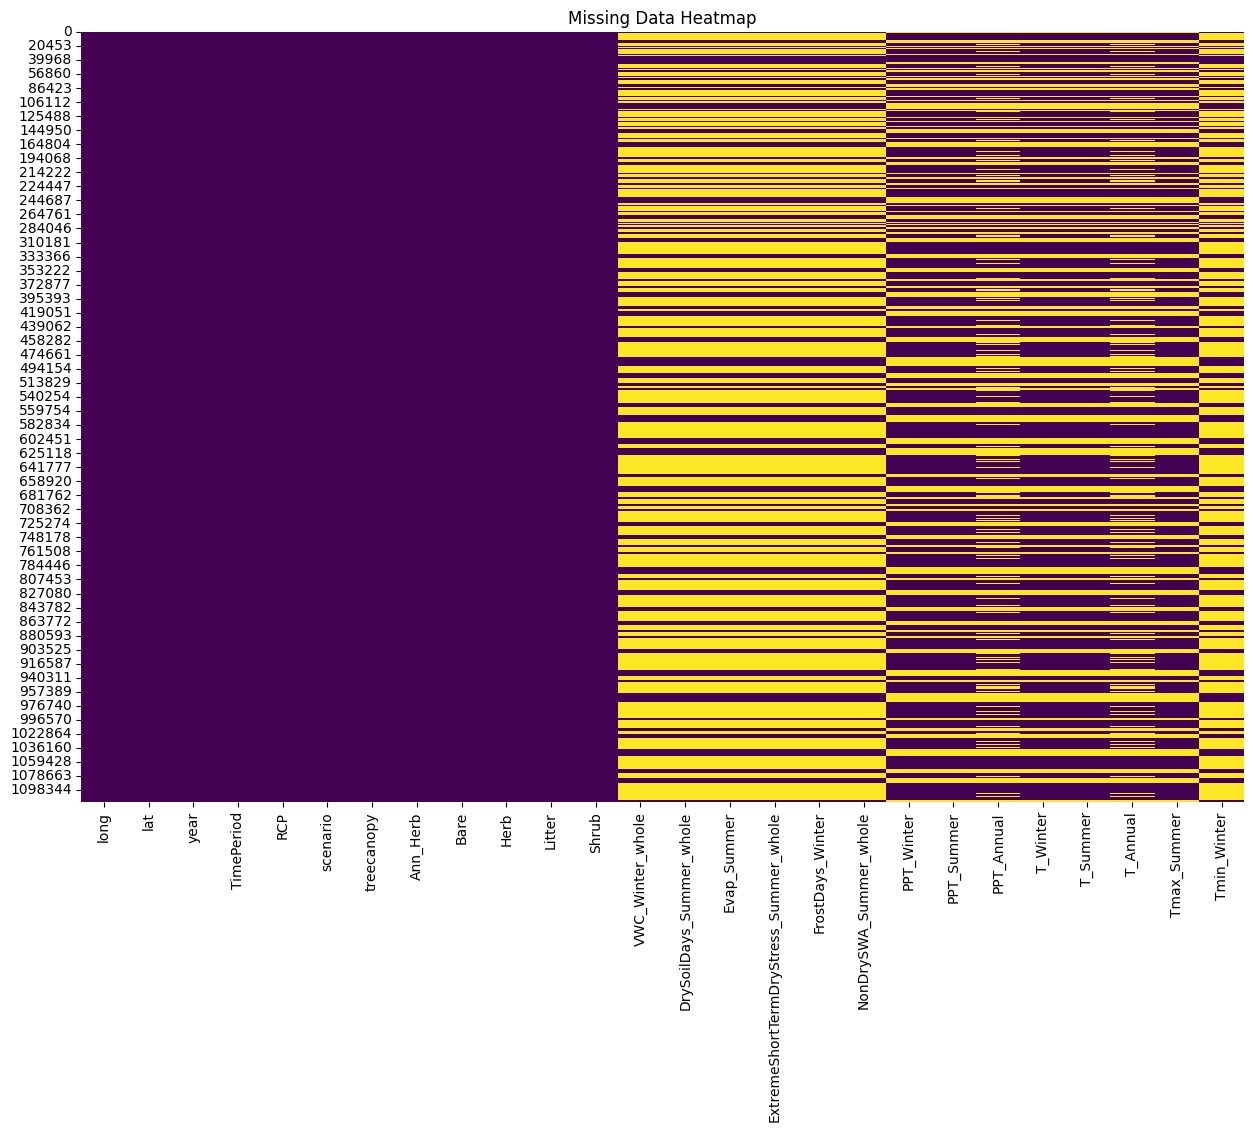

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is loaded into 'df'
# Replace 'df' with the actual name of your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Visualize missing values
plt.figure(figsize=(15, 10))
sns.heatmap(NABR_historic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

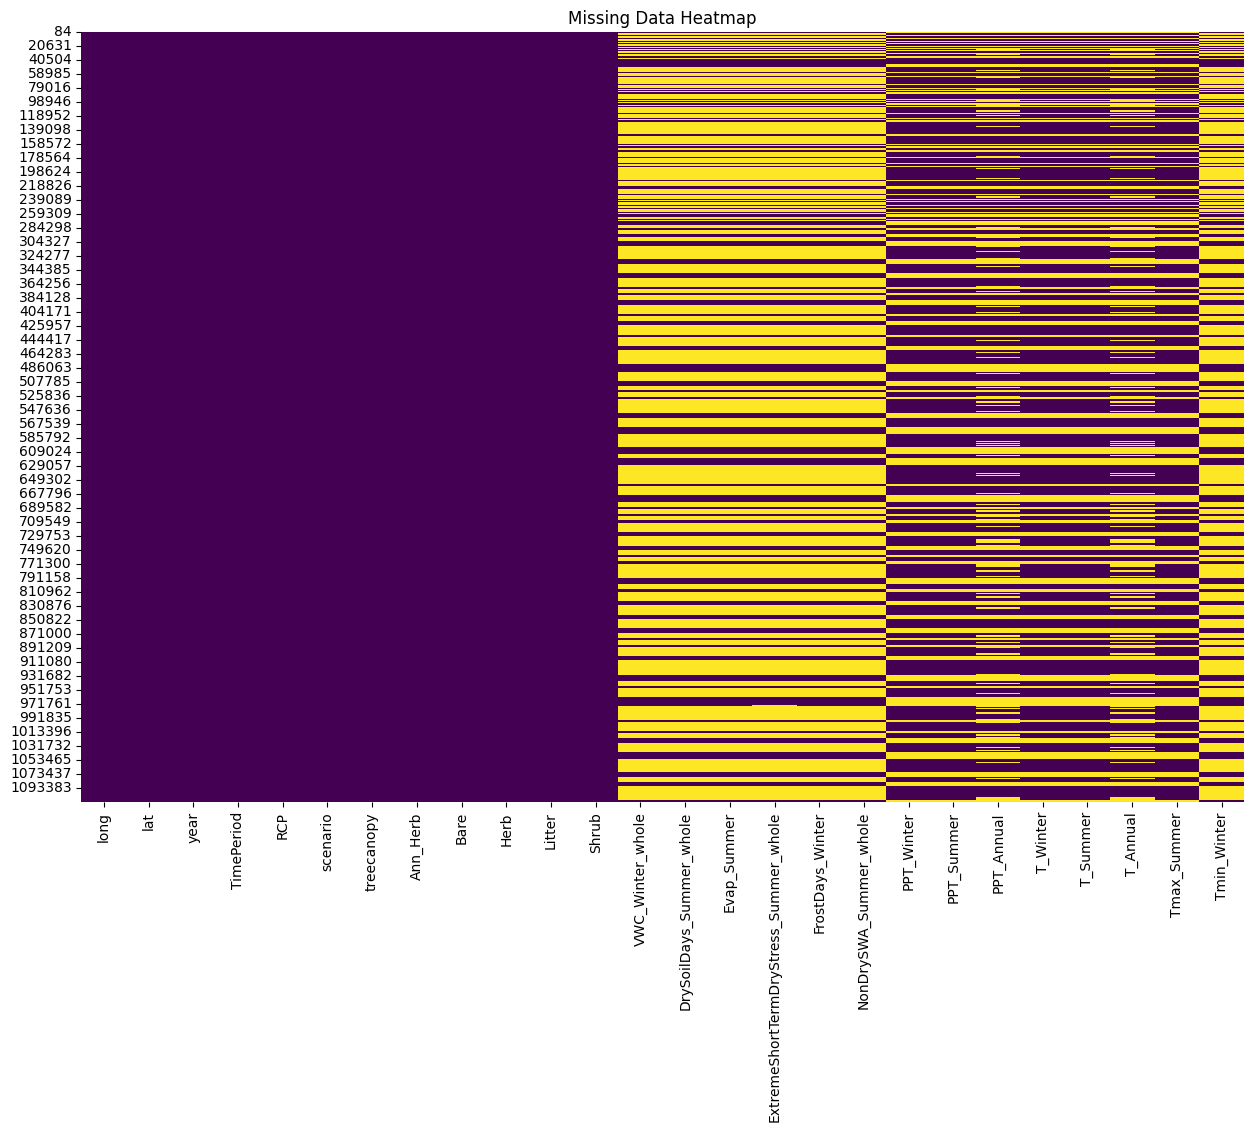

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is loaded into 'df'
# Replace 'df' with the actual name of your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Visualize missing values
plt.figure(figsize=(15, 10))
sns.heatmap(NABR_nearterm.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

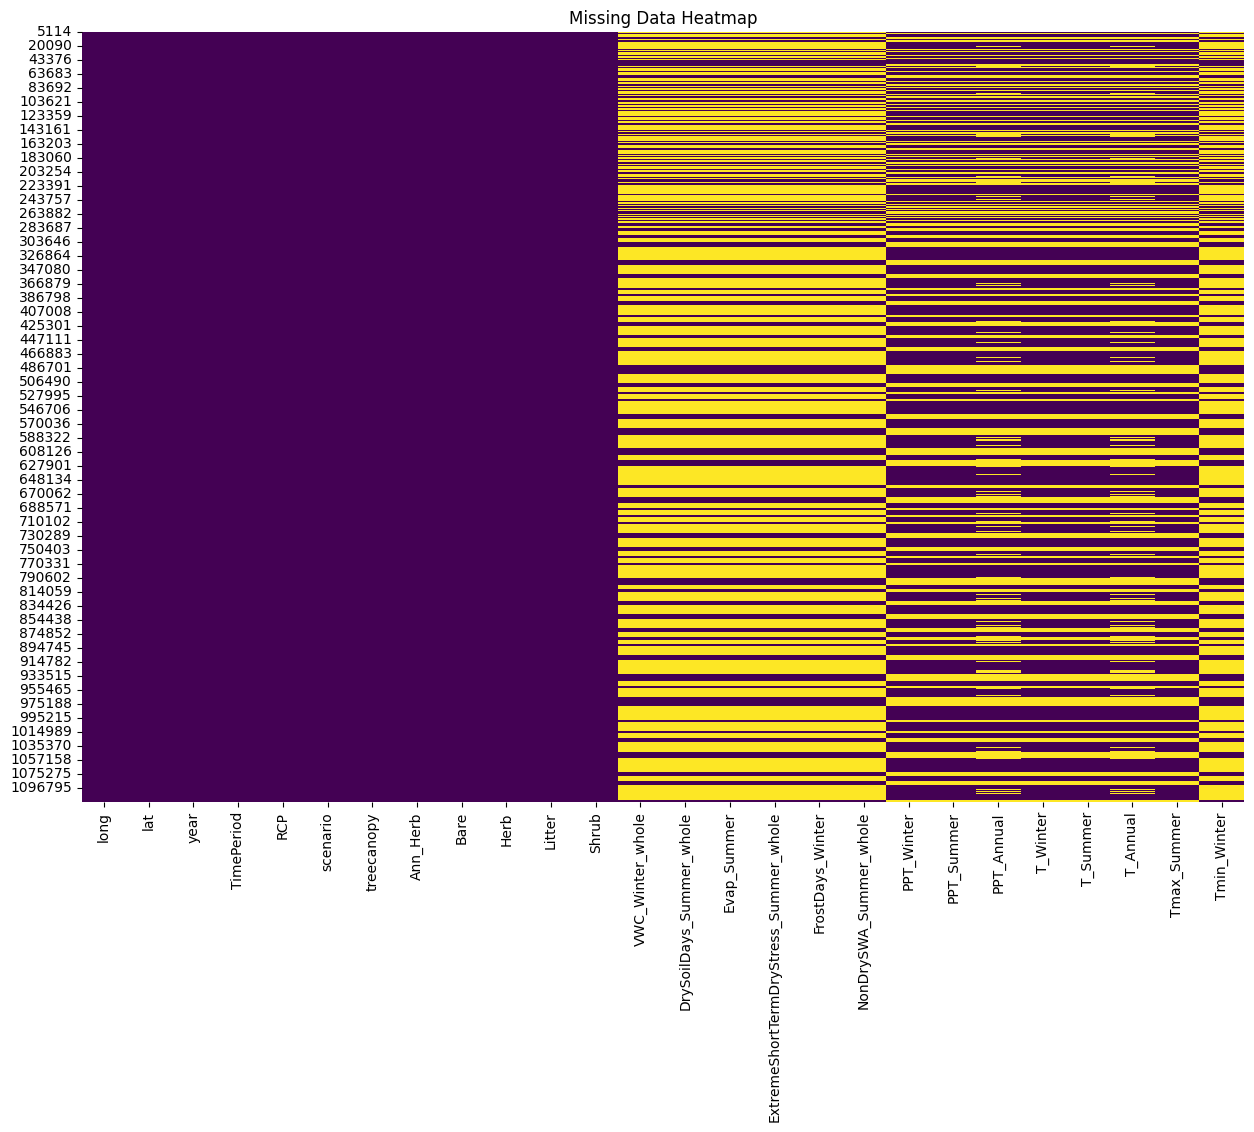

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is loaded into 'df'
# Replace 'df' with the actual name of your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Visualize missing values
plt.figure(figsize=(15, 10))
sns.heatmap(NABR_longterm.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [32]:
# Assuming 'nearterm_data' is already defined and contains data from 2020 to 2059
# We will split this data into 5-year intervals, with the last interval containing only 4 years

# Initialize a list to hold the file paths for the saved files
file_paths = []

# Loop through the years in 5-year intervals, except the last one which will be 4 years
for start_year in range(2020, 2055, 5):
    end_year = start_year + 4
    if end_year > 2059:  # Ensure we don't go beyond 2059
        end_year = 2059
    
    # Filter the data for the current interval
    interval_data = NABR_nearterm[(NABR_nearterm['year'] >= start_year) & (NABR_nearterm['year'] <= end_year)]
    
    # Define the file name based on the year interval
    file_name = f'./processed_data/nearterm_data_{start_year}-{end_year}.csv'
    file_paths.append(file_name)
    
    # Save the interval data to a CSV file
    interval_data.to_csv(file_name, index=False)

file_paths


['./processed_data/nearterm_data_2020-2024.csv',
 './processed_data/nearterm_data_2025-2029.csv',
 './processed_data/nearterm_data_2030-2034.csv',
 './processed_data/nearterm_data_2035-2039.csv',
 './processed_data/nearterm_data_2040-2044.csv',
 './processed_data/nearterm_data_2045-2049.csv',
 './processed_data/nearterm_data_2050-2054.csv']